In [7]:
using LsqFit
using PyPlot

In [6]:
#Data import
pldata = readdlm("mystery_planet.txt")
time_data = pldata[:,1]
RV_data = pldata[:,2]
err_data = pldata[:,3]

59-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.3
 1.3
 1.2
 1.1
 1.1
 1.1
 1.2
 1.2
 1.1
 1.2
 ⋮  
 1.0
 1.2
 1.3
 1.3
 1.3
 1.2
 1.3
 1.4
 1.5
 1.2
 1.1
 1.4

In [17]:
#Sort by phase given period
phase = Array(Real,length(time_data))
period = 10.
phase = mod(time_data,period)
#time_data
newarray = sortrows()

59-element Array{Float64,1}:
 3.82196
 3.82264
 3.82336
 5.16632
 5.16702
 5.16775
 0.12242
 0.12308
 0.12372
 1.11653
 1.11724
 1.11797
 9.10185
 ⋮      
 6.7334 
 7.73062
 1.94048
 2.72022
 2.7208 
 2.72139
 3.02461
 3.02698
 3.03026
 5.72624
 8.73474
 5.1871 

In [22]:
phase_data_arr = [phase RV_data] #combine arrays
phase_sorted = sortrows(phase_data_arr, by=x->x[1]) #sort by phase

59x2 Array{Float64,2}:
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 1.16959    95.0
 1.80566   -30.5
 1.84867  -237.2
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 ⋮              
 7.00429    68.3
 7.16184    12.3
 7.18024  -180.8
 7.73062  -237.0
 7.92941  -221.9
 8.10796  -213.6
 8.73474  -142.7
 8.8737   -227.3
 9.10185    90.7
 9.1025     91.1
 9.10312    87.7
 9.16606    46.7

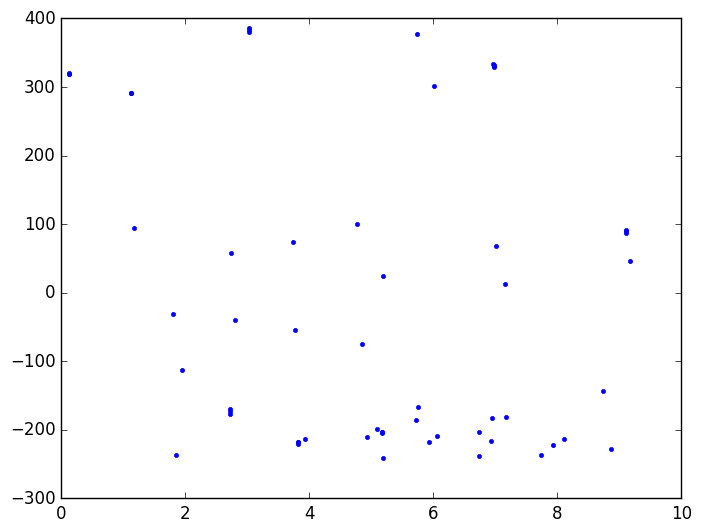

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa0dd9752d0>

In [30]:
plot(phase_data_arr[:,1],phase_data_arr[:,2],".")

In [84]:
period = linspace(1,3500,100000)
sum = Array(Real,length(period))

for (j,P) in enumerate(period)
    sum[j] = 0.0
    #Sort by phase given period
    phase = Array(Real,length(time_data))
    phase = mod(time_data,P)
    phase_data_arr = [phase RV_data] #combine arrays
    phase_sorted = sortrows(phase_data_arr, by=x->x[1]) #sort by phase
    for i in 2:length(time_data)
        sum[j] += (phase_sorted[i,2]-phase_sorted[i-1,2])*(phase_sorted[i,2]-phase_sorted[i-1,2])
    end
end
sum

100000-element Array{Real,1}:
 2.58033e6
 3.21359e6
 3.02553e6
 3.14458e6
 3.03096e6
 3.8313e6 
 3.94352e6
 3.38432e6
 3.59938e6
 3.4122e6 
 2.62869e6
 3.32299e6
 2.87204e6
 ⋮        
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6

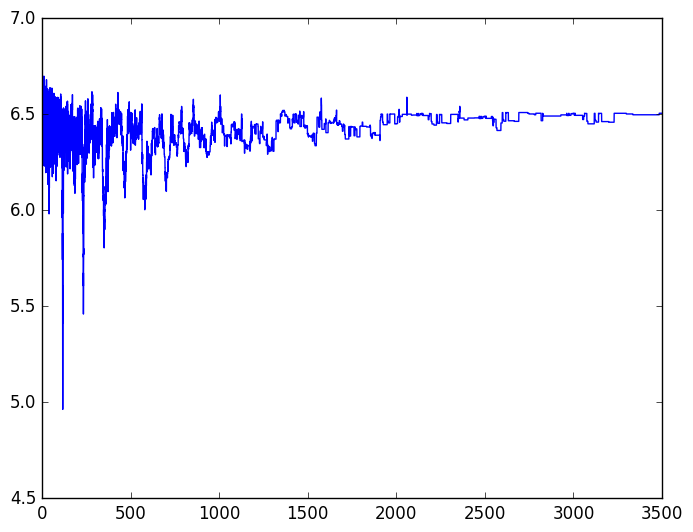

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa0dc93e5d0>

In [85]:
plot(period,log10(sum))

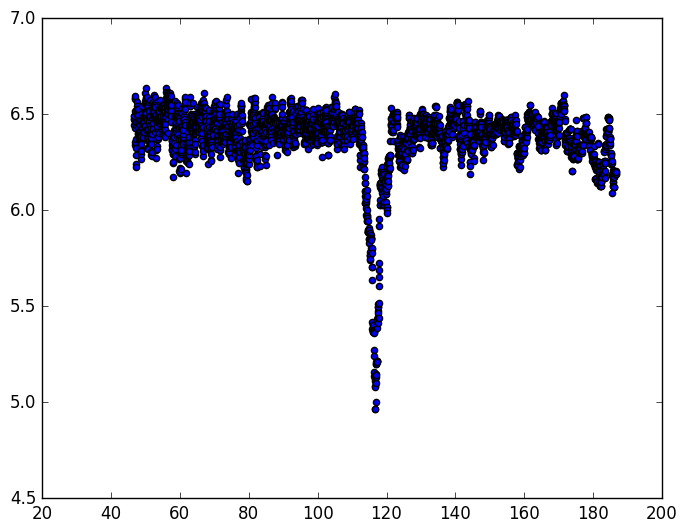

PyObject <matplotlib.collections.PathCollection object at 0x7fa0dc870dd0>

In [86]:
min_index=indmin(sum)
min_per=period[min_index]
npts = 2000
scatter(period[min_index-npts:min_index+npts],log10(sum[min_index-npts:min_index+npts]))

In [87]:
P = min_per
sum = 0.0
#Sort by phase given period
phase = Array(Real,length(time_data))
phase = mod(time_data,P)
phase_data_arr = [phase RV_data] #combine arrays
phase_sorted = sortrows(phase_data_arr, by=x->x[1]) #sort by phase
for i in 2:length(time_data)
    sum += (phase_sorted[i,2]-phase_sorted[i-1,2])*(phase_sorted[i,2]-phase_sorted[i-1,2])
end

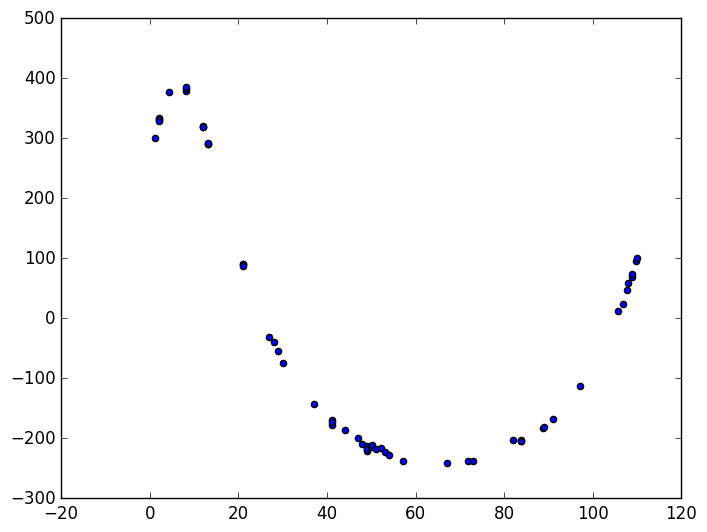

PyObject <matplotlib.collections.PathCollection object at 0x7fa0dc630f90>

In [90]:
scatter(phase_sorted[:,1],phase_sorted[:,2])

### K, $\varpi, \gamma$ Analytical Solution

In [99]:
; pwd

/home/linc/Documents/598_exoplanets/ExoJulia/Homework/hw2/Andrew_Spencer


In [1]:
push!(LOAD_PATH, "../../../ExoJulia/")
# import
using ExoJulia

# Call kepler_solve!()
#M = 0.1;
#ecc = 0.0;
#E = ExoJulia.Orbit.kepler_solve!(M, ecc)

LoadError: LoadError: ArgumentError: ExoJulia not found in path
while loading In[1], in expression starting on line 3

In [92]:
#Functions
function f_func(time,ecc,period,time_peri)
    M = 2*pi/period*(time-time_peri)
    E = kepler_solve(ecc,M)
    f = 2*arctan(sqrt((1+ecc)/(1-ecc))*tan(E/2))
    f   
end

f_func (generic function with 1 method)

In [ ]:
#Will loop over these
ecc = 0.1
time_peri = 0.0



In [109]:
M = 0.1;
ecc = 0.0;
E = ExoJulia.Orbit.kepler_solve!(M, ecc)

LoadError: LoadError: UndefVarError: kepler_solve! not defined
while loading In[109], in expression starting on line 3

In [9]:
F = Array(Real,4,length(time_data))

for i in 1:length(time_data)
    F[i,1] = cos(f_func(time_data[i],ecc,period,time_peri))
    F[i,2] = sin(f_func(time_data[i],ecc,period,time_peri))
    F[i,3] = 1.0
    F[i,4] = time_data[i]-time_data[1]
end

W = Array(Real,length(time_data),length(time_data))

for i in 1:length(time_data)
    W[i,i] = (err_data[i])^(-2)
end

B = RV_data*W*F'*inv(F*W*F')

#B = {h,c,v0,d}
h = B[1]
c = B[2]
v0 = B[3]
K = sqrt(h*h + c*c)
curlypi = arctan(-c/h)
gam = v0 - K*ecc*cos(curlypi)

LoadError: LoadError: UndefVarError: f_func not defined
while loading In[9], in expression starting on line 3